# A study of linear and tree models on the Boston Housing Data 
## Goals and Background

The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html ), and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. *Hedonic prices and the demand for clean air*, J. Environ. Economics & Management, vol.5, 81-102, 1978. The name for this dataset is simply **boston**. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted.    

This notebook focusses on predicting `MEDV` (median price variable).

### Variables    
There are 14 attributes in each case of the dataset. They are:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in 1000's
    
    
Note: Variable #14 (`MEDV`), the response variable in our case seems to be censored at 50.00 (corresponding to a median price of 50,000); Censoring is suggested by the fact that the highest median price of exactly 50,000 is reported in 16 cases, while 15 cases have prices between 40,000 and 50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.    


## Approach
This notebook takes the following approach:

1. Exploratory data analysis to visualize the dataset and develop an intuition for the same.
2. Preprocessing the data to organize the dataset in the desired form for developing models 
3. Fitting the models on the preprocessed data. Two types of models will be fitted:
    - Linear Models
    - Tree based models
4. Check the performance of the models. We will check both the in-sample and out-of-sample performance to check if there is any overfitting.
5. Conclusion

---

### 1. Exploratory data analysis to visualize the dataset and develop an intuition for the same.
Lets import the libraries and the dataset. We will use sklearn to import the dataset.    

**Imports**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from IPython.display import HTML, display
%matplotlib inline

**Load the Boston Housing Dataset**

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()
print(boston_data.data.shape)

(506, 13)


In [4]:
boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston['MEDV'] = pd.Series(boston_data.target)
del boston_data
display(boston.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Exploratory Data analysis**

In [5]:
display(boston.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
##Check Null values
boston.isna().sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
## Check the feature correlations. 
## I will use the absolute values of the correlations to get a nice heatmap of feature importances from lowest (in yellow) to highest (blue)
from itertools import cycle
plt.style.use('bmh')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

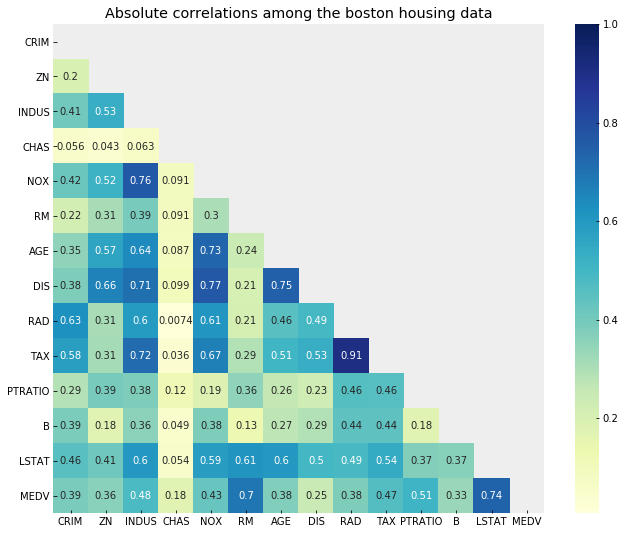

In [8]:
corr = boston.corr().apply(lambda x : np.abs(x))
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask=mask, cmap="YlGnBu",annot=True).set_title('Absolute correlations among the boston housing data');

_Inference_:    
- We can see that there is high correlation among the variables that are in darker shades of blue.
- There is little to no correlations among the lighter shades of yellow and green.
- `MEDV` is highly correlated with `LSTAT`, `RM`, `INDUS`, `TAX` and `PTRATIO` and `NOX` in that order from highest to lowest correlation.   

**Outlier detection**

Lets check if there are any outliers in our dataset

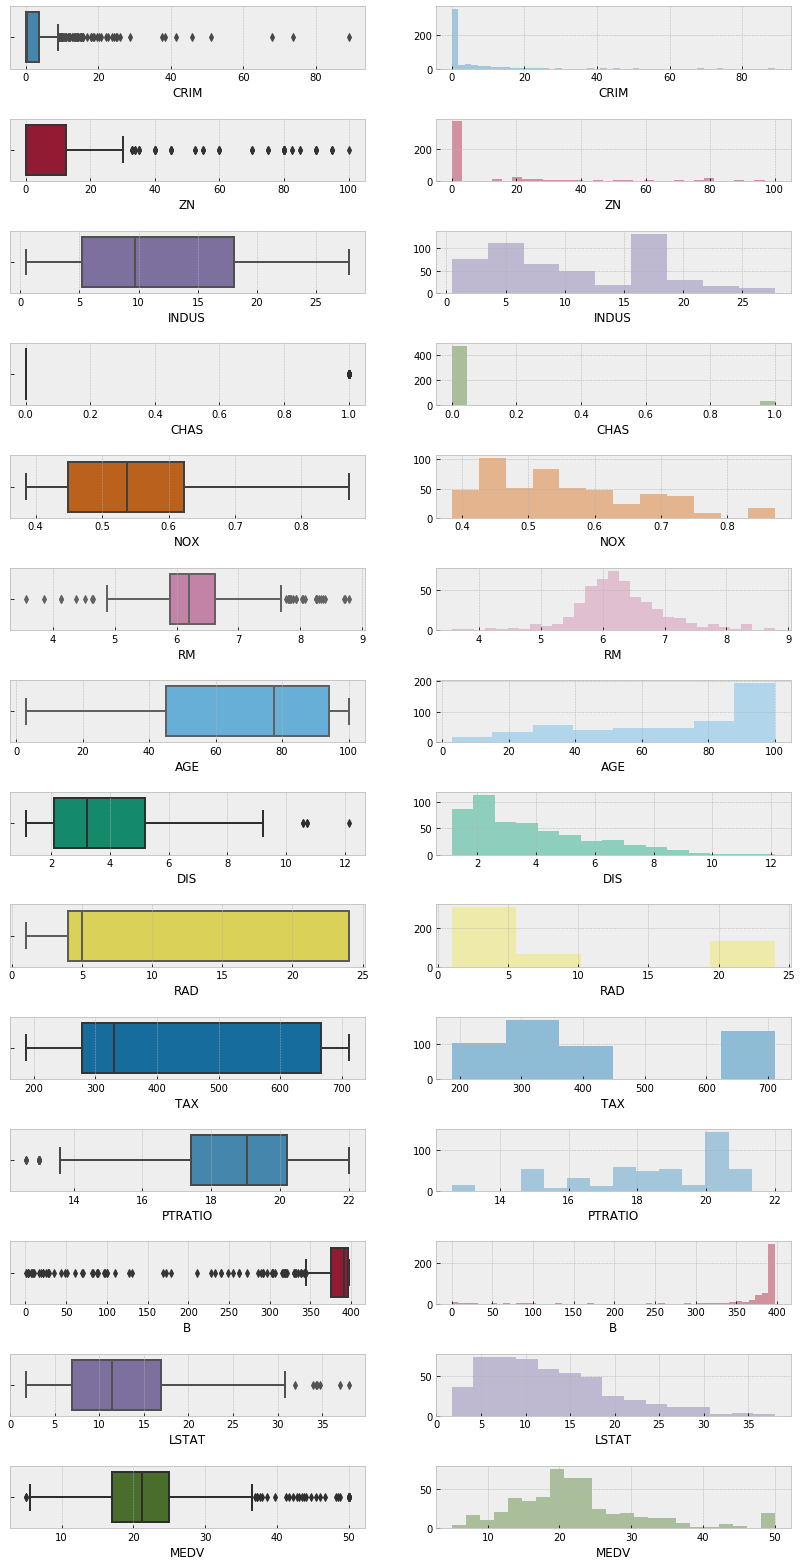

In [9]:
f, ax = plt.subplots(14,2,figsize = (14,28))
plt.subplots_adjust(hspace = 0.8)
for i, col in enumerate(boston.columns):
    color = next(color_cycle)
    sns.boxplot(boston[col],ax=ax[i,0],color=color)
    sns.distplot(boston[col],ax=ax[i,1],color=color,norm_hist=False, kde=False)

_Inference_:
- Looking at the box plots, we can witness that there are significant outliers in many of the variables, however, as the histograms suggest, most of our variables are not normally distributed and there is considerable skewness in the dataset.
- Most of the features in the datset are somewhat skewed, however, exceptions are the response variable `MEDV` and `RM` which have a nice bell shaped curve.
- `MEDV` on the other hand has a significant spike at the value of 50. This is also the max price in the dataset and suggests that the price was clipped to 50,000 while collecting the data. This can significantly affect our model and we will remove the variable


In [10]:
print(boston.MEDV.value_counts().head())
boston = boston[boston.MEDV != 50.0]

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
Name: MEDV, dtype: int64


Lets check the values of each of the variables side by side to see if the values are comparable. We will use the log scale on the y-axis for easier readability.

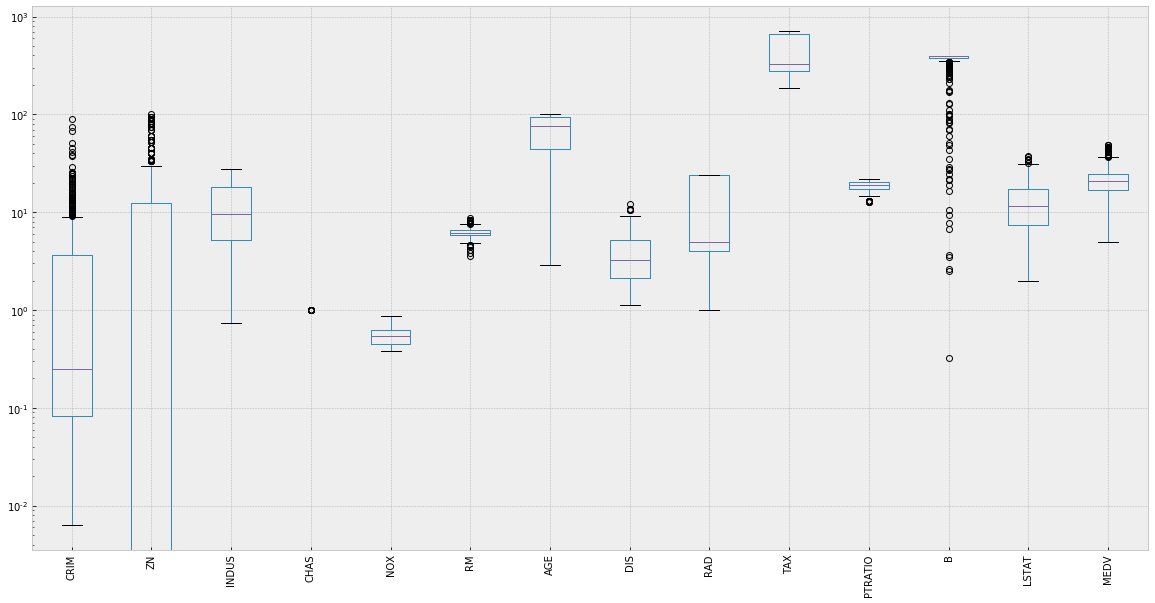

In [11]:
boston.plot(kind='box', rot=90, logy=True,figsize=(20,10));

_Inference_:
- We see that different features are on different scales our linear models(regularized ones) would need to have the data scaled
- There are a lot of outliers in the dataset in majority of the features.
- We will first see how each predictor models the response.
    
Lets separate the dataset into `X` and `y` arrays first

In [12]:
X= boston.iloc[:,:-1]
y = boston.iloc[:,-1]

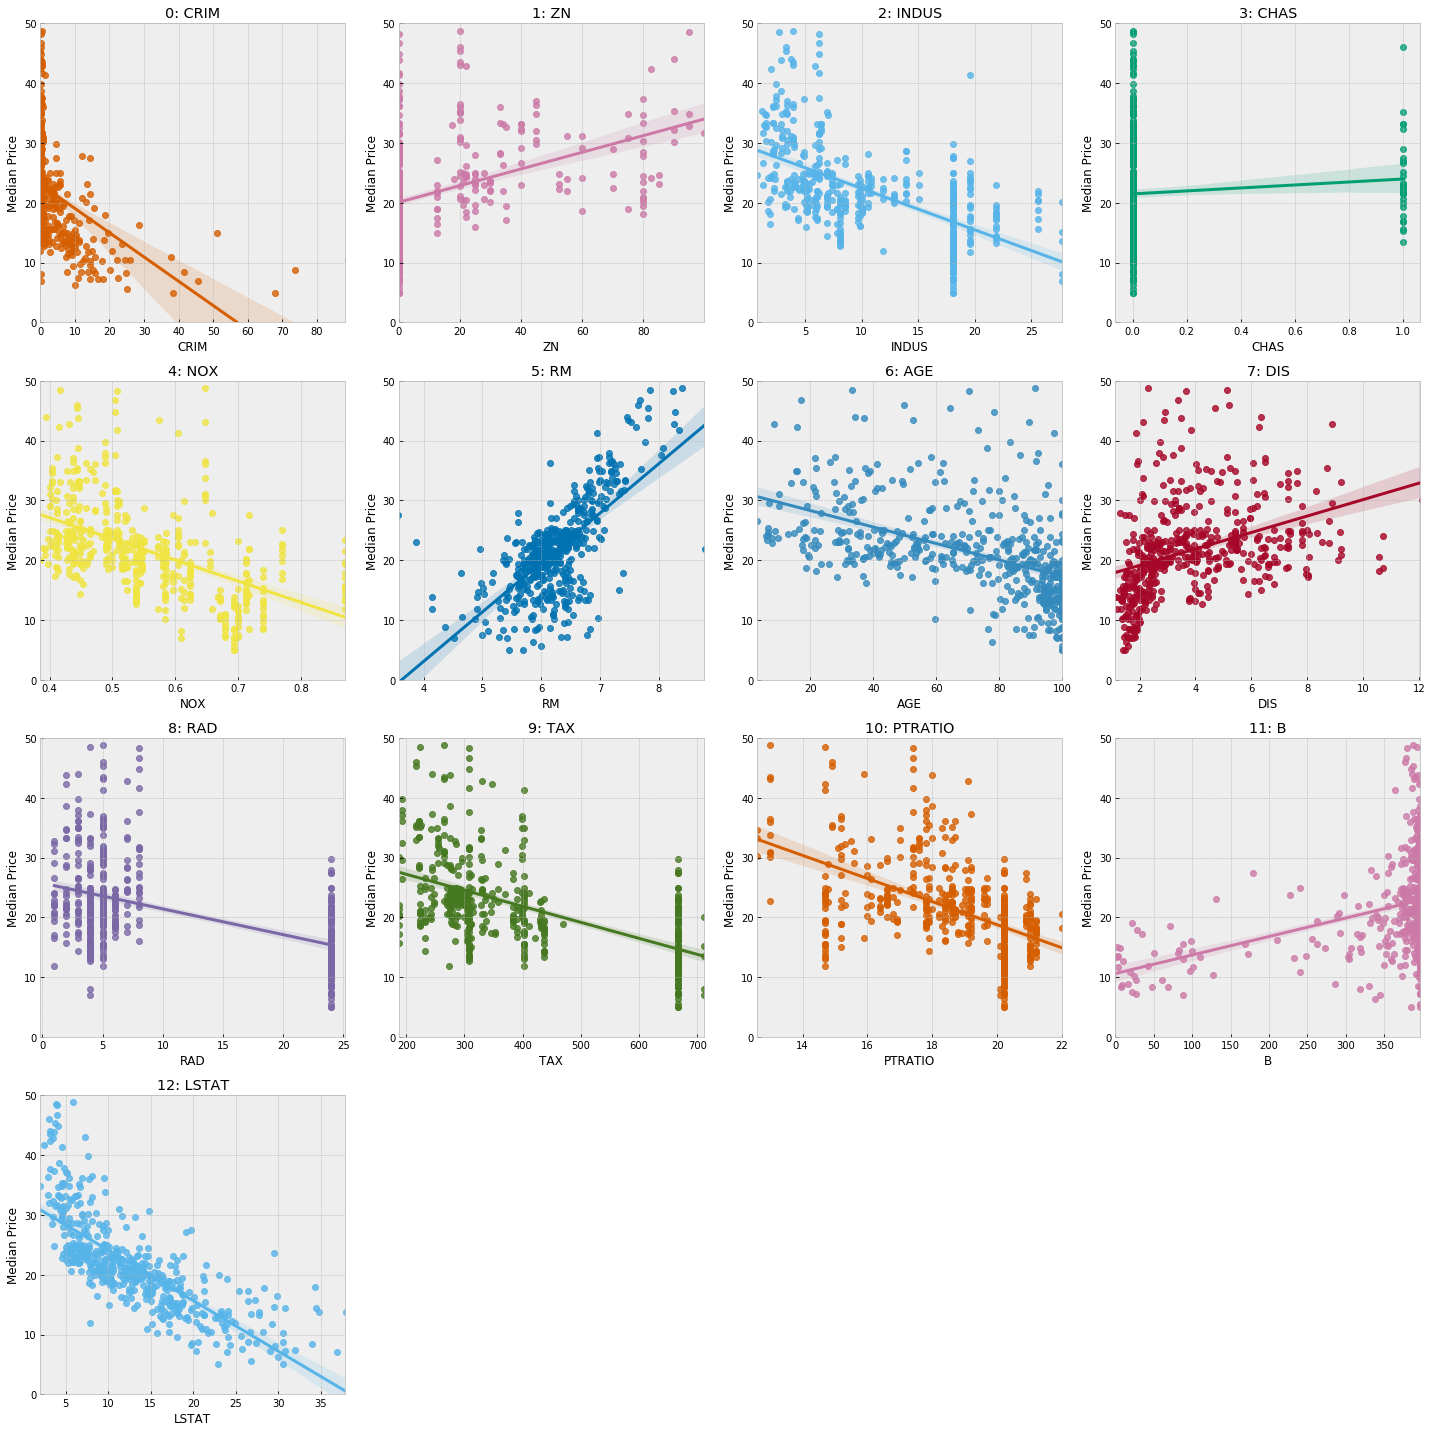

In [13]:
##Plot reference https://github.com/amueller/COMS4995-s20/blob/master/slides/aml-04-preprocessing/aml-07-preprocessing.ipynb
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    X_col = X.iloc[:, i]
    ax.set_ylim(0, 50)
    if X_col.nunique() > 10:
        ax.set_xlim(X_col.quantile(q=.0001), X_col.quantile(q=.9999))    
    #ax.scatter(X_col, y, c=next(color_cycle))
    sns.regplot(X_col, y, color=next(color_cycle),ax=ax,)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Median Price")
plt.tight_layout()

_Inference_:
- `seaborn` allows us to fit a linear regression line through the `regplot` module. We use this to visualize how each predictor affects our response and the confidence of the linear fit which is shown by the translucent edges along the regression line.
- Also, these plots allow us to visualize the direction of the relationship in the data. For instance, we can see that the relation between `MEDV` and `LSTAT` is negative whereas the slope of the linear fit between `MEDV` and `RM` is positive implying a strong positive correlation.
- Althought we just fit a linear model above, it can be argued that a non-linear function could better capture the relationship in the data.  
- We will use this information and incorporate all of them in the model.
---

### 2. Preprocessing the data to organize the dataset in the desired form for developing models    

- We need to preprocess the boston dataset as the variables are on somewhat vastly different scale. When using a regularized model like Lasso or Ridge, the model penalizes the weights of the coefficients and if certain variables are very large, their weigts become extremely small or vice versa, leading to a bad fit on the data.
- However, decision trees do not have this issue, and we will use the unscaled data for fitting the tree based models

In [14]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size = 0.7, test_size=0.3)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
### 3. Fitting the models on the preprocessed data. Two types of modesls will be fitted:

### Linear models    

Linear models for regression that are included in the analysis below are Linear Regression, Lasso and Ridge models.


- ** Ridge Regression**

Linear least squares with l2 regularization.
Minimizes the objective function

$|| y - Xw ||^2_2 + \alpha * || w ||^2_2$

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV

ridge_pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), RidgeCV())
ridge_pipe.fit(X_train,y_train)

rp_scores = cross_val_score(ridge_pipe, X_train, y_train, cv=5)
print(f'Ridge R2 score for train set {ridge_pipe.score(X_train,y_train):.3f}')
print(f'Ridge R2 score for validation set {np.mean(rp_scores):.3f}')
print(f'Ridge R2 score for test set {ridge_pipe.score(X_test,y_test):.3f}')

Ridge R2 score for train set 0.937
Ridge R2 score for validation set 0.896
Ridge R2 score for test set 0.840


- **Linear Regression**    

Ordinary least squares Linear Regression.    
LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

In [16]:
linear_pipe = make_pipeline(PolynomialFeatures(), LinearRegression())
linear_pipe.fit(X_train,y_train)

lp_scores = cross_val_score(linear_pipe, X_train, y_train, cv=5)
print(f'Linear Regression R2 score for train set {linear_pipe.score(X_train,y_train):.3f}')
print(f'Linear Regression R2 score for validation set {np.mean(lp_scores):.3f}')
print(f'Linear Regression R2 score for test set {linear_pipe.score(X_test,y_test):.3f}')


Linear Regression R2 score for train set 0.913
Linear Regression R2 score for validation set 0.751
Linear Regression R2 score for test set 0.661


- **Lasso Regression**    

Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

(1 / (2 * {n_samples{)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).


In [17]:
from sklearn.linear_model import LassoCV

lasso_pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), LassoCV(cv=5,max_iter=4000))
lasso_pipe.fit(X_train,y_train)

las_scores = cross_val_score(lasso_pipe, X_train, y_train, cv=5)
print(f'Lasso R2 score for train set {lasso_pipe.score(X_train,y_train):.3f}')
print(f'Lasso R2 score for validation set {np.mean(las_scores):.3f}')
print(f'Lasso R2 score for test set {lasso_pipe.score(X_test,y_test):.3f}')

Lasso R2 score for train set 0.943
Lasso R2 score for validation set 0.891
Lasso R2 score for test set 0.837


### Tree Based Models

The notebook implements Decision Trees, Bagging, AdaBoost and Random Forests

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,RandomForestRegressor

In [19]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y, model, params):    
    regressor = model
    params = params
    grid = GridSearchCV(estimator=regressor, param_grid=params,cv=5)
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data\
    return grid.best_estimator_

- Adaboost    

An AdaBoost regressor is a meta-estimator that begins by fitting a
regressor on the original dataset and then fits additional copies of the
regressor on the same dataset but where the weights of instances are
adjusted according to the error of the current prediction. As such,
subsequent regressors focus more on difficult cases.

In [20]:
params = {'n_estimators': np.arange(40,100,10)}

run = False
if run:
    reg = fit_model(X_train, y_train,AdaBoostRegressor(random_state=1),params)
    print(reg.get_params())

In [21]:
ada_fit = AdaBoostRegressor(random_state=1,learning_rate=1.0,n_estimators=100).fit(X_train,y_train)
ada_scores = cross_val_score(estimator = ada_fit, X = X_train, y = y_train, cv = 10)

print(f'Adaboost R2 score for train set {ada_fit.score(X_train,y_train):.3f}')
print(f'Adaboost R2 score for validation set {np.mean(ada_scores):.3f}')
print(f'Adaboost R2 score for test set {ada_fit.score(X_test,y_test):.3f}')

Adaboost R2 score for train set 0.911
Adaboost R2 score for validation set 0.820
Adaboost R2 score for test set 0.829


- Decision Tree Regressor

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [22]:
params = {'max_depth': np.arange(1,11,1)}

if run:
    reg = fit_model(X_train, y_train,DecisionTreeRegressor(random_state=1,),params)
    print(reg.get_params())

In [23]:
dt_fit = DecisionTreeRegressor(random_state=1,max_depth=8).fit(X_train,y_train)
dt_scores = cross_val_score(estimator = dt_fit, X = X_train, y = y_train, cv = 10)

print(f'Decision Tree R2 score for train set {dt_fit.score(X_train,y_train):.3f}')
print(f'Decision Tree R2 score for validation set {np.mean(dt_scores):.3f}')
print(f'Decision Tree R2 score for test set {dt_fit.score(X_test,y_test):.3f}')

Decision Tree R2 score for train set 0.978
Decision Tree R2 score for validation set 0.743
Decision Tree R2 score for test set 0.797


- **Bagging**

A Bagging regressor is an ensemble meta-estimator that fits base
regressors each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

In [24]:
from sklearn.ensemble import BaggingRegressor
params = {'n_estimators': [10,50,100,300]}

if run:
    reg = fit_model(X_train, y_train,BaggingRegressor(random_state=1),params)
    print(reg.get_params())

In [25]:
bg_fit = BaggingRegressor(random_state=1,n_estimators=1000).fit(X_train,y_train)
bg_scores = cross_val_score(estimator = bg_fit, X = X_train, y = y_train, cv = 10)

print(f'Bagging  R2 score for train set {bg_fit.score(X_train,y_train):.3f}')
print(f'Bagging Tree R2 score for validation set {np.mean(bg_scores):.3f}')
print(f'Bagging Tree R2 score for test set {bg_fit.score(X_test,y_test):.3f}')

Bagging  R2 score for train set 0.982
Bagging Tree R2 score for validation set 0.850
Bagging Tree R2 score for test set 0.852


- **Random Forrests**

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

In [26]:
from sklearn.ensemble import RandomForestRegressor
params = {'bootstrap': [True, False],
 'max_depth': range(2,11),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 50, 80, 100, 120, 150, 200]}

if run:
    reg = fit_model(X_train, y_train,RandomForestRegressor(random_state=1),params)
    print(reg.get_params())

In [27]:
rf_fit = RandomForestRegressor(bootstrap= False, ccp_alpha= 0.0, criterion= 'mse', max_depth= 10, max_features= 'sqrt', max_leaf_nodes= None, max_samples= None, min_impurity_decrease= 0.0, min_impurity_split= None, min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0, n_estimators= 150, n_jobs= None, oob_score= False, random_state= 1, verbose= 0, warm_start= False).fit(X_train,y_train)
rf_scores = cross_val_score(estimator = rf_fit, X = X_train, y = y_train, cv = 10)

print(f'Random Forest  R2 score for train set {rf_fit.score(X_train,y_train):.3f}')
print(f'Random Forest R2 score for validation set {np.mean(rf_scores):.3f}')
print(f'Random Forest R2 score for test set {rf_fit.score(X_test,y_test):.3f}')

Random Forest  R2 score for train set 0.997
Random Forest R2 score for validation set 0.865
Random Forest R2 score for test set 0.855


### 4. Check the performance of the models. We will check both the in-sample and out-of-sample performance to check if there is any overfitting.




In [28]:
ridge = {'Train':ridge_pipe.score(X_train,y_train),
'Validation': np.mean(rp_scores),
'Test': ridge_pipe.score(X_test,y_test)}
linear = {'Train':linear_pipe.score(X_train,y_train),
'Validation': np.mean(lp_scores),
'Test': linear_pipe.score(X_test,y_test)}
lasso = {'Train':lasso_pipe.score(X_train,y_train),
'Validation': np.mean(las_scores),
'Test': lasso_pipe.score(X_test,y_test)}
ada = {'Train':ada_fit.score(X_train,y_train),
'Validation': np.mean(ada_scores),
'Test': ada_fit.score(X_test,y_test)}
dt = {'Train':dt_fit.score(X_train,y_train),
'Validation': np.mean(dt_scores),
'Test': dt_fit.score(X_test,y_test)}
bg = {'Train':bg_fit.score(X_train,y_train),
'Validation': np.mean(bg_scores),
'Test': bg_fit.score(X_test,y_test)}
rf = {'Train':rf_fit.score(X_train,y_train),
'Validation': np.mean(rf_scores),
'Test': rf_fit.score(X_test,y_test)}

results = pd.DataFrame([ridge],index=['Ridge']) \
.append(pd.DataFrame([linear],index=['Linear'])) \
.append(pd.DataFrame([lasso],index=['Lasso'])) \
.append(pd.DataFrame([ada],index=['AdaBoost'])) \
.append(pd.DataFrame([dt],index=['Decision Trees'])) \
.append(pd.DataFrame([bg],index=['Bagging'])) \
.append(pd.DataFrame([rf],index=['Random Forests']))

In [29]:
print("The R2 scores for our various models")
results = results[['Train','Validation','Test']]
display(results.sort_values(by=['Test'],ascending=False))

The R2 scores for our various models


,Train,Validation,Test
Random Forests,0.997175,0.865385,0.854511
Bagging,0.981866,0.850436,0.851728
Ridge,0.937444,0.896093,0.839519
Lasso,0.942901,0.891482,0.837352
AdaBoost,0.911201,0.819823,0.828920
Decision Trees,0.977825,0.742625,0.797097
Linear,0.913369,0.750643,0.660810


### 5. Conclusions


We can see that in general, the Tree based Models outperform Linear Models. However, Regularization provides the linear models with a strong boost of score as regularization helps tune the weights of the models better to prevent overfitting.    

In tree-based models, we see that out-of-sample predictions are best on the Random Forests and Bagging. However, the in-sample and out-of-sample perfromance varies a lot and this definitely is a sign of overfitting. Tree based models are known to overfit as they capture noise more and more and fail to generalize well. Since, we only had about 490 data points, out of which we used only 70 percent for training. We can attribute the overfitting to the lack of samples in this case and more data should help resolve overfitting issues.

---